In [1]:
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from util import get_pic, gaussian_2d, gaussian_fit

def plot_2d_array(array, cmap='viridis', title="2D Array Visualization", xlabel="X-axis", ylabel="Y-axis"):

    if not isinstance(array, np.ndarray) or len(array.shape) != 2:
        raise ValueError("输入必须是二维的 NumPy 数组。")
    
    plt.figure(figsize=(6, 6))  # 设置画布大小
    plt.imshow(array, cmap=cmap, interpolation='nearest')  # 绘制二维数组图像
    plt.colorbar(label='Value')  # 添加颜色条
    plt.title(title)  # 添加标题
    plt.xlabel(xlabel)  # 添加 X 轴标签
    plt.ylabel(ylabel)  # 添加 Y 轴标签
    plt.show()

def plot_gaussian_3d(offset=0, amp=10, x0=0, y0=0, sigma=2):

    x_range_local = range(0, 7)
    y_range_local = range(0, 7)

    yi, xi = np.meshgrid(y_range_local, x_range_local)
    xyi = np.vstack([xi.ravel(), yi.ravel()])
    
    # 计算高斯函数值
    zi = gaussian_2d(xyi, offset, amp, x0, y0, sigma)
    zi = zi.reshape(xi.shape)  # 重新调整为二维形状
    
    # 创建 3D 图
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # 绘制高斯曲面
    surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none', alpha=0.8)
    
    # 添加颜色条
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
    
    # 设置图标题和轴标签
    ax.set_title("2D Gaussian Function")
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Amplitude")
    
    # 显示图像
    plt.show()

# Gaussian Visualization

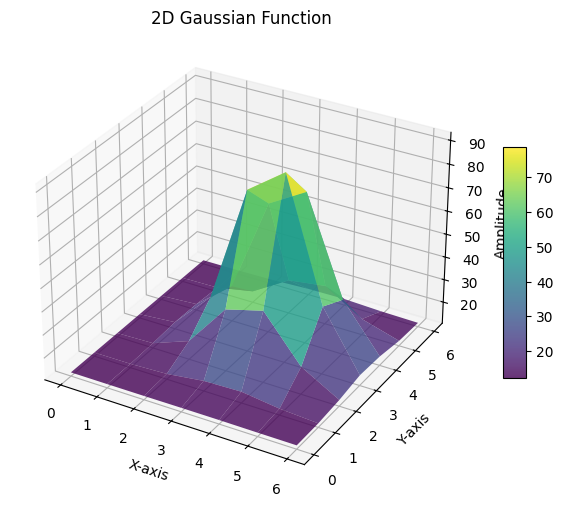

In [2]:
plot_gaussian_3d(12.1702419, 91.8958614, 3.62989655, 3.31904142, 0.90914484)

# Gaussian Fitting

In [6]:
cell_stack = tiff.imread('/home/xiong/Desktop/bad-case/field/f1/1/cellraw_25795.tif').squeeze()
assert cell_stack.ndim == 3

# true positive
site_dict = {
    129: [58, 70],
    143: [51, 69],
    148: [47, 68],
    209: [59, 68],
    186: [59, 73],
    187: [58, 74],
    188: [56, 73], 
    190: [58, 71], 
    191: [57, 74],
    204: [58, 70],
    205: [58, 70],
    212: [60, 69],
    213: [60, 69],
    222: [63, 68],
    225: [67, 64],
}


# false positive
# site_dict = {
#     20: [55, 47],
#     27: [51, 69],
#     29: [49, 67],
#     30: [53, 59],
#     31: [49, 67],
#     37: [46, 68], 
#     38: [47, 68],
#     39: [48, 69],
#     40: [46, 68],
#     41: [47, 63],
#     42: [46, 64],
#     45: [47, 66],
#     46: [46, 65],
#     48: [46, 65],
#     49: [46, 64],
#     50: [45, 63],
#     197: [49, 49],
#     203: [52, 48],
# }

# for idx, (y, x) in site_dict.items():

#     pic = get_pic(cell_stack[idx-1], x, y)

#     print(f'pic: \n{pic}')

#     plot_2d_array(pic)

In [7]:
for idx, (y, x) in site_dict.items():

    pic = get_pic(cell_stack[idx-1], x, y)
    
    res = gaussian_fit(pic, 3, fix_sigma=False)

    if res == None :
        print('=====')
    else: 
        popt, zfit = res
        
        print(popt)
        # plot_2d_array(pic)
        # plot_2d_array(zfit)

=====
[17.83338292 73.76673408  2.72555596  3.36574491  0.51686159]
[22.65947832 56.92575041  3.42401402  2.73155961  0.98154144]
[12.17024175 91.89586152  3.62989655  3.31904142  0.90914484]
[ 25.71358013 104.54989457   2.65215115   2.71096684   0.5438465 ]
[32.07518328 44.96883449  2.98039961  3.40532073  0.54162412]
[ 9.95014495 80.24311119  3.16167279  3.09081397  1.19050521]
[ 24.3691294  211.46419517   3.35675581   2.83332469   0.4529914 ]
[ 36.51860469 164.67853936   3.48576455   2.63267072   0.48233318]
[ 26.13523652 166.09043562   2.96846898   3.42015649   0.52000454]
[35.99436053 77.73234548  2.88834647  3.35610501  0.48059987]
[ 29.46289193 148.95153906   3.48184455   3.120035     0.61600032]
[26.29807592 78.75519381  2.88311722  2.74162927  0.69973801]
[31.96157818 66.75284881  2.97717851  3.00552038  0.12837156]
[ 36.95301231 136.40904062   2.57789836   2.72677027   0.4478911 ]
